In [6]:
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM, SimpleRNN
from keras.datasets import imdb
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

In [7]:
max_features = 20000
batch_size = 32
max_len = 80

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [8]:
model_layers_dict = {}
for dropout_percentage in [0, 0.1, 0.2, 0.3]:
    model_layers_dict[dropout_percentage] = [
        Embedding(max_features, 16),
        SimpleRNN(16, input_shape=(max_features,max_len)),
        Dropout(dropout_percentage),
        Dense(1, activation='sigmoid'),
    ]

models = {}

for k, v in model_layers_dict.items():
    model = Sequential(v)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    models[k] = model
    print(k)
    model.summary()

0
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 16)          320000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 16)                528       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320,545
Trainable params: 320,545
Non-trainable params: 0
_________________________________________________________________
0.1
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedd

In [9]:
history_dict = {}
for k, model in tqdm(models.items()):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))
    history_dict[k] = history

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/5
782/782 [==============================] - 17s 21ms/step - loss: 0.4861 - accuracy: 0.7574 - val_loss: 0.3961 - val_accuracy: 0.8281
Epoch 2/5
782/782 [==============================] - 16s 20ms/step - loss: 0.2975 - accuracy: 0.8808 - val_loss: 0.3809 - val_accuracy: 0.8312
Epoch 3/5
782/782 [==============================] - 15s 19ms/step - loss: 0.2079 - accuracy: 0.9226 - val_loss: 0.4135 - val_accuracy: 0.8255
Epoch 4/5
782/782 [==============================] - 17s 21ms/step - loss: 0.1478 - accuracy: 0.9492 - val_loss: 0.4649 - val_accuracy: 0.8140
Epoch 5/5
782/782 [==============================] - 16s 21ms/step - loss: 0.0984 - accuracy: 0.9672 - val_loss: 0.5616 - val_accuracy: 0.8018


 25%|██▌       | 1/4 [01:20<04:01, 80.62s/it]

Epoch 1/5
782/782 [==============================] - 16s 19ms/step - loss: 0.5588 - accuracy: 0.6904 - val_loss: 0.4043 - val_accuracy: 0.8203
Epoch 2/5
782/782 [==============================] - 17s 22ms/step - loss: 0.3226 - accuracy: 0.8692 - val_loss: 0.4210 - val_accuracy: 0.8052
Epoch 3/5
782/782 [==============================] - 17s 22ms/step - loss: 0.2181 - accuracy: 0.9195 - val_loss: 0.4326 - val_accuracy: 0.8296
Epoch 4/5
782/782 [==============================] - 16s 21ms/step - loss: 0.1487 - accuracy: 0.9474 - val_loss: 0.4931 - val_accuracy: 0.8163
Epoch 5/5
782/782 [==============================] - 17s 22ms/step - loss: 0.0933 - accuracy: 0.9702 - val_loss: 0.6100 - val_accuracy: 0.8129


 50%|█████     | 2/4 [02:44<02:44, 82.24s/it]

Epoch 1/5
782/782 [==============================] - 17s 20ms/step - loss: 0.5714 - accuracy: 0.6851 - val_loss: 0.4524 - val_accuracy: 0.7962
Epoch 2/5
782/782 [==============================] - 15s 19ms/step - loss: 0.3440 - accuracy: 0.8594 - val_loss: 0.3883 - val_accuracy: 0.8303
Epoch 3/5
782/782 [==============================] - 18s 24ms/step - loss: 0.2262 - accuracy: 0.9173 - val_loss: 0.4335 - val_accuracy: 0.8126
Epoch 4/5
782/782 [==============================] - 16s 20ms/step - loss: 0.1420 - accuracy: 0.9512 - val_loss: 0.5271 - val_accuracy: 0.8102
Epoch 5/5
782/782 [==============================] - 16s 21ms/step - loss: 0.0858 - accuracy: 0.9726 - val_loss: 0.6506 - val_accuracy: 0.8104


 75%|███████▌  | 3/4 [04:06<01:22, 82.25s/it]

Epoch 1/5
782/782 [==============================] - 22s 27ms/step - loss: 0.5334 - accuracy: 0.7252 - val_loss: 0.4130 - val_accuracy: 0.8191
Epoch 2/5
782/782 [==============================] - 25s 32ms/step - loss: 0.3346 - accuracy: 0.8678 - val_loss: 0.4177 - val_accuracy: 0.8133
Epoch 3/5
782/782 [==============================] - 25s 32ms/step - loss: 0.2294 - accuracy: 0.9154 - val_loss: 0.4510 - val_accuracy: 0.8138
Epoch 4/5
782/782 [==============================] - 19s 25ms/step - loss: 0.1442 - accuracy: 0.9504 - val_loss: 0.5395 - val_accuracy: 0.8077
Epoch 5/5
782/782 [==============================] - 15s 20ms/step - loss: 0.0750 - accuracy: 0.9768 - val_loss: 0.6779 - val_accuracy: 0.8076


100%|██████████| 4/4 [05:52<00:00, 88.20s/it]


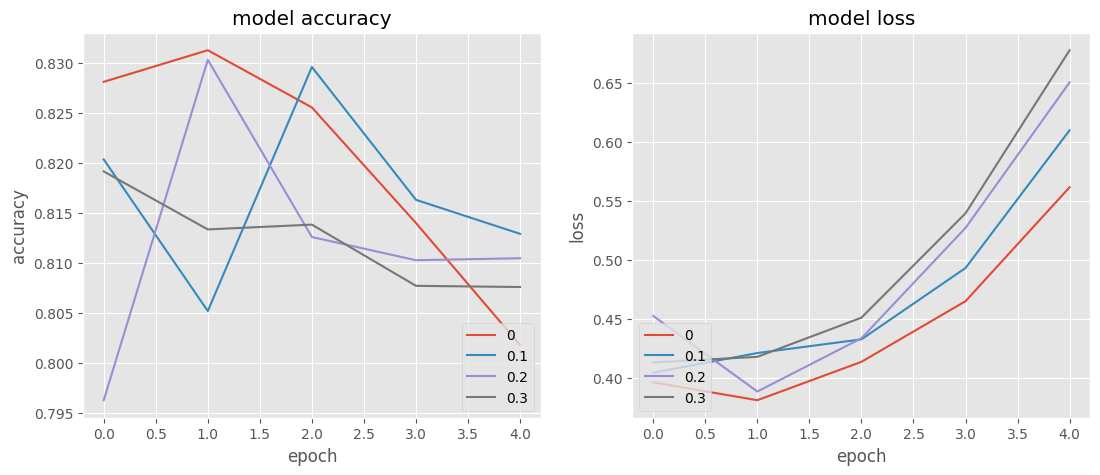

In [10]:
plt.style.use('ggplot')
fig, axis = plt.subplots(1, 2)
fig.set_size_inches(13, 5)

for k, history in history_dict.items():
    plt.sca(axis[0])
    plt.plot(history.history['val_accuracy'], label=k)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='lower right')

    plt.sca(axis[1])
    plt.plot(history.history['val_loss'], label=k)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc='lower left')
plt.savefig(f'plots/'+ " ".join([str(x) for x in models.keys()]) + '.png');